In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Analysis Process**

**(1): Asking Questions** (Understand the problem or question you want to answer. Set clear objectives and goals for the analysis.)

**(2): Data Wrangling**

a. Gathering Data
 - i. CSV files
 - ii. APIs
 - iii. Web Scraping
 - iv. Databases

b. Assessing Data

c. Cleaning Data

**(3): Exploratory Data Analysis**

**(4): Drawing Conclusion**

**(5): Comunicating Results**



**Types of Unclean Data**

There are 2 kinds of unclean data

**(1): Dirty Data (Data with Quality issues):**

 Dirty data, also known as low quality data. Low quality data has content issues.

   **Duplicated data**

   **Missing Data**

   **Corrupt Data**

   **Inaccurate Data**

**(2): Messy Data(Data with tidiness issues):**

 Messy data, also known as untidy data. Untidy data has structural issues.Tidy data has the following properties:

  **Each variable forms a column**

  **Each observation forms a row**

  **Each observational unit forms a table**

In [2]:
patientsDF = pd.read_csv('/content/patients.csv')
treatmentDF = pd.read_csv('/content/treatments.csv')
treatmentCutDF = pd.read_csv('/content/treatments_cut.csv')
adverseReactionsDF = pd.read_csv('/content/adverse_reactions.csv')

In [3]:
patientsDF.sample(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
336,337,female,Sharon,Collins,1240 Summit Park Avenue,Pontiac,MI,48342.0,United States,248-978-1574SharonLCollins@jourrapide.com,9/3/1932,164.8,67,25.8
61,62,male,Alan,Milne,707 Gateway Avenue,Bakersfield,California,93301.0,United States,AlanMilne@dayrep.com1 661 779 6795,4/29/1962,244.9,69,36.2
296,297,female,Chỉ,Lâm,NaN,NaN,NaN,NaN,NaN,NaN,5/14/1990,181.1,63,32.1
58,59,female,Yasmin,Araujo,3682 Stiles Street,Pittsburgh,PA,15205.0,United States,YasminCardosoAraujo@superrito.com412-640-7035,3/21/1981,196.0,67,30.7
26,27,female,Ella,Lund,1207 Garfield Road,Peoria,IL,61602.0,United States,309-671-8852EllaLund@armyspy.com,12/19/1933,144.8,61,27.4


In [4]:
treatmentDF.sample(5)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
99,abel,yonatan,-,38u - 39u,7.88,7.50,NaN
48,zak,kelly,-,38u - 38u,7.66,7.26,NaN
248,brianna,lansell,39u - 47u,-,9.48,9.06,NaN
72,gabrielle,bidwill,-,44u - 49u,7.76,7.37,0.39


In [5]:
treatmentCutDF.sample(5)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
6,sara,miles,30u - 35u,-,7.53,7.12,NaN
20,seweryna,czerwinska,39u - 46u,-,7.66,7.30,0.36
30,trifon,izmailov,58u - 63u,-,7.68,7.28,NaN
7,frydryk,adamski,63u - 74u,-,7.75,7.27,NaN
45,štefanija,novosel,37u - 42u,-,7.64,7.17,NaN


In [6]:
adverseReactionsDF.sample(5)

,given_name,surname,adverse_reaction
19,finley,chandler,headache
0,berta,napolitani,injection site discomfort
24,kang,mai,injection site discomfort
23,merci,leroux,hypoglycemia
6,louise,johnson,hypoglycemia


**1. Write a summary for your data**

This is a dataset about 500 patients of which 350 patients participated in a clinical trial. None of the patients were using Novodra (a popular injectable insulin) or Auralin (the oral insulin being researched) as their primary source of insulin before. All were experiencing elevated HbA1c levels.

All 350 patients were treated with Novodra to establish a baseline HbA1c level and insulin dose. After 4 weeks, which isn’t enough time to capture all the change in HbA1c that can be attributed by the switch to Auralin or Novodra:

175 patients switched to Auralin for 24 weeks
175 patients continued using Novodra for 24 weeks
Data about patients feeling some adverse effects is also recorded.

**2. Write Column descriptions**

**Table ->** `patients:`

**patient_id:** the unique identifier for each patient in the Master Patient Index (i.e. patient database) of the pharmaceutical company that is producing Auralin

**assigned_sex:** the assigned sex of each patient at birth (male or female)

**given_name:** the given name (i.e. first name) of each patient

**surname:** the surname (i.e. last name) of each patient

**address:** the main address for each patient

**city:** the corresponding city for the main address of each patient

**state:** the corresponding state for the main address of each patient

**zip_code:** the corresponding zip code for the main address of each patient

**country:** the corresponding country for the main address of each patient (all United states for this clinical trial)

**contact:** phone number and email information for each patient

**birthdate:** the date of birth of each patient (month/day/year). The inclusion criteria for this clinical trial is age >= 18 (there is no maximum age because diabetes is a growing problem among the elderly population)

**weight:** the weight of each patient in pounds (lbs)

**height:** the height of each patient in inches (in)

**bmi:** the Body Mass Index (BMI) of each patient. BMI is a simple calculation using a person's height and weight. The formula is BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared. A BMI of 25.0 or more is overweight, while the healthy range is 18.5 to 24.9. The inclusion criteria for this clinical trial is 16 >= BMI >= 38.

**Table ->** `treatments and treatment_cut:`

**given_name:** the given name of each patient in the Master Patient Index that took part in the clinical trial

**surname:** the surname of each patient in the Master Patient Index that took part in the clinical trial

**auralin:** the baseline median daily dose of insulin from the week prior to switching to Auralin (the number before the dash) and the ending median daily dose of insulin at the end of the 24 weeks of treatment measured over the 24th week of treatment (the number after the dash). Both are measured in units (shortform 'u'), which is the international unit of measurement and the standard measurement for insulin.

**novodra:** same as above, except for patients that continued treatment with Novodra

**hba1c_start:** the patient's HbA1c level at the beginning of the first week of treatment. HbA1c stands for Hemoglobin A1c. The HbA1c test measures what the average blood sugar has been over the past three months. It is thus a powerful way to get an overall sense of how well diabetes has been controlled. Everyone with diabetes should have this test 2 to 4 times per year. Measured in %.

**hba1c_end:** the patient's HbA1c level at the end of the last week of treatment

**hba1c_change:** the change in the patient's HbA1c level from the start of treatment to the end, i.e., hba1c_start - hba1c_end. For Auralin to be deemed effective, it must be "noninferior" to Novodra, the current standard for insulin. This "noninferiority" is statistically defined as the upper bound of the 95% confidence interval being less than 0.4% for the difference between the mean HbA1c changes for Novodra and Auralin (i.e. Novodra minus Auralin).

**Table ->** `adverse_reactions`

**given_name:** the given name of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)

**surname:** the surname of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)

**adverse_reaction:** the adverse reaction reported by the patient

**3. Add any additional information
Additional useful information:**

Insulin resistance varies person to person, which is why both starting median daily dose and ending median daily dose are required, i.e., to calculate change in dose.
It is important to test drugs and medical products in the people they are meant to help. People of different age, race, sex, and ethnic group must be included in clinical trials. This diversity is reflected in the patients table.

**Types of Assessment**

`There are 2 types of assessment styles`

`Manual` - Looking through the data manually in google sheets

`Programmatic` - By using pandas functions such as info(), describe() or sample()

`Steps in Assessment
There are 2 steps involved in Assessment`

`Discover`

`Document`

**Issues with the dataset**

**Dirty Data**

**Table -** `Patients`

`patient_id = 9` has misspelled name 'Dsvid' instead of David `accuracy`

`state col` sometimes contain full name and some times abbrivietation `consistency`

`zip code col` has entries with 4 digit `validity`

`data missing` for 12 patients in address,city, state,zip_code ,country, contact `completion`

`incorrect data type` assigned to sex, zip code, birthdate `validity`

`duplicate entries` by the name of John Doe `accuracy`

`one patient` has weight = 48 pounds `accuracy`

`one patient` has height = 27 inches `accuracy`

**Table -** `Treatments & Treatments_cut` (treatments_merge)

`given_name and surname` col is all lower case `consistency`

`remove u` from Auralin and Novadra cols `validity`

`'-' in novadra and Auralin` col treated as nan `validity`

`missing values in hba1c_change` col `completion`

`1 duplicate` entry by the name Joseph day `accuracy`

`in hba1c_change` 9 instead of 4 `accuracy`

**Messy Data**

**Table -** `Patients`

`contact col` contains both `phone and email`

**Table -** `Treatments & Treatments_cut`

`Auralin and Novadra col` should be split into 2 cols start and end dose

`merge both the tables`

**Table -** `Adverse_reactions`

`This table should not exist independently`

**Automatic Assessment**

head and tail

sample

info

isnull

duplicated

describe

In [7]:
patientsDF = pd.read_csv('/content/patients.csv')
adverse_reactionsDF = pd.read_csv('/content/adverse_reactions.csv')
treatmentsDF = pd.read_csv('/content/treatments.csv')
treatments_cutDF = pd.read_csv('/content/treatments_cut.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   contact       491 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


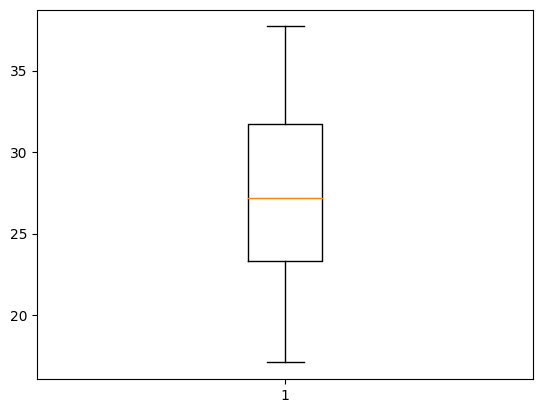

In [8]:
patientsDF.tail()
patientsDF.info()
patientsDF[patientsDF['address'].isnull()]
patientsDF.duplicated().sum()
patientsDF.describe()
plt.boxplot(patientsDF['bmi'])
plt.show()


In [9]:
# FINDING OUTLIERS:

q3 = patientsDF['bmi'].quantile(0.75)
q1 = patientsDF['bmi'].quantile(0.25)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

patientsDF[patientsDF['bmi'] > upper_bound]


,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi


In [10]:
adverse_reactionsDF.head()
adverse_reactionsDF.info()
adverse_reactionsDF.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   given_name        34 non-null     object
 1   surname           34 non-null     object
 2   adverse_reaction  34 non-null     object
dtypes: object(3)
memory usage: 944.0+ bytes


,given_name,surname,adverse_reaction
count,34,34,34
unique,34,33,6
top,berta,johnson,hypoglycemia
freq,1,2,19


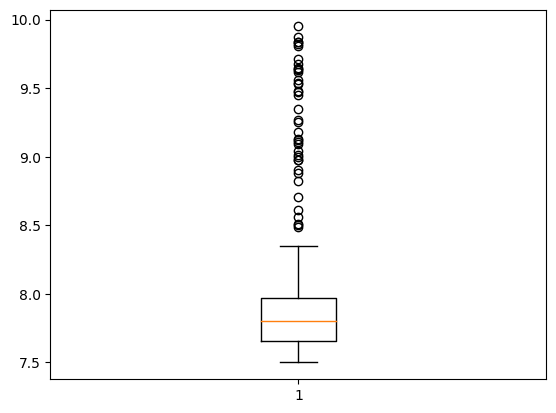

In [11]:
treatmentsDF.head()
treatmentsDF[treatmentsDF.duplicated()]
treatmentsDF[treatmentsDF.duplicated(subset=['given_name'	,'surname'])]
treatmentsDF.sort_values('hba1c_change',na_position='first')
treatmentsDF.describe()
plt.boxplot(treatmentsDF['hba1c_start'])
plt.show()

In [12]:
q3 = treatmentsDF['hba1c_start'].quantile(0.75)
q1 = treatmentsDF['hba1c_start'].quantile(0.25)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

x = treatmentsDF[(treatmentsDF['hba1c_start'] > 8)]

x['hba1c_start'].sort_values(ascending=False)


,hba1c_start
166,9.95
75,9.87
81,9.84
171,9.84
25,9.82
124,9.81
192,9.71
24,9.68
233,9.65
231,9.64


In [13]:
treatments_cutDF.tail()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
65,rovzan,kishiev,32u - 37u,-,7.75,7.41,0.34
66,jakob,jakobsen,-,28u - 26u,7.96,7.51,0.95
67,bernd,schneider,48u - 56u,-,7.74,7.44,0.30
68,berta,napolitani,-,42u - 44u,7.68,7.21,NaN
69,armina,sauvé,36u - 46u,-,7.86,7.40,NaN


**Note -** `Assessing Data is an Iterative Process`

**Data Quality Dimensions**

`Completeness ->` is data missing?

`Validity ->` is data invalid -> negative height -> duplicate patient id

`Accuracy ->` data is valid but not accurate -> weight -> 1kg

`Consistency ->` both valid and accurate but written differently -> New Youk and NY

**Order of severity**

`Completeness <- Validity <- Accuracy <- Consistency`

**Data Cleaning Order**

`Quality ->` Completeness

`Tidiness`

`Quality ->` Validity

`Quality ->` Accuracy

`Quality ->` Consistency

**Steps involved in Data cleaning**

`Define`

`Code`

`Test`

Always make sure to create a copy of your pandas dataframe before you start the cleaning process

In [14]:
patientsDF_copy = patientsDF.copy()
treatmentsDF_copy = treatmentsDF.copy()
treatments_cutDF_copy = treatments_cutDF.copy()
adverse_reactionsDF_copy = adverse_reactionsDF.copy()

# Define

### Dirty Data

    Replace all missing values in `patientsDF_copy` with "no
    data."

    Calculate changes in values by subtracting hba1c_start from hba1c_end, resulting in values like 4 instead of 9.
    Validity

    In the treatments_merge table, add a leading zero to zip codes that are 4 digits long to make them 5 digits.

    Change data types of assigned_sex and birthdate in the Patient table.

    Correct the name Dsvid to David in the Patient table.

    Remove duplicated rows in the Patient table, where all columns are the same except for different patient IDs.

    Delete outlier values like weight = 48 pounds and height = 27 inches.

    Remove a duplicate entry named Joseph in the treatments_merge table.

    Capitalize the given_name and surname columns in the treatments_merge table to match the format in the Patient table.


### Messy Data (Unstructural Data)

    Merge treatmentsDF_copy and treatmentsDF_cut_copy tables, then transform the auralin and novodra columns into a long format, split start and end ranges, remove the letter 'u,' and change their data types from object to int.

    In the adverse_reactions table, merge with the treatments_merge table, which has two identical columns.



In [15]:
# code
patientsDF_copy.fillna('No data',inplace=True)

<ipython-input-15-56a028c466e8>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No data' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  patientsDF_copy.fillna('No data',inplace=True)


In [16]:
#test
patientsDF_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       503 non-null    object 
 5   city          503 non-null    object 
 6   state         503 non-null    object 
 7   zip_code      503 non-null    object 
 8   country       503 non-null    object 
 9   contact       503 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 55.1+ KB


In [17]:
# code
treatmentsDF_copy['hba1c_change'] = treatmentsDF_copy['hba1c_start'] - treatmentsDF_copy['hba1c_end']
treatments_cutDF_copy['hba1c_change'] = treatments_cutDF_copy['hba1c_start'] - treatments_cutDF_copy['hba1c_end']

In [18]:
#test
treatments_cutDF_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    70 non-null     object 
 1   surname       70 non-null     object 
 2   auralin       70 non-null     object 
 3   novodra       70 non-null     object 
 4   hba1c_start   70 non-null     float64
 5   hba1c_end     70 non-null     float64
 6   hba1c_change  70 non-null     float64
dtypes: float64(3), object(4)
memory usage: 4.0+ KB


In [19]:
#code

# concate treatmentsDF_copy & treatments_cutDF_copy Tables:
treatments_merge = pd.concat([treatmentsDF_copy,treatments_cutDF_copy]).reset_index(drop=True)

# #auralin and novodra's column changes in long formate
treatments_merge = treatments_merge.melt(id_vars=['given_name','surname','hba1c_start','hba1c_end','hba1c_change'],var_name='type',value_name='dosage_range')

# #remove null values in dosage ranges
treatments_merge = treatments_merge[treatments_merge['dosage_range'] != '-'].reset_index(drop=True)

# # auralin and novodra's dosage ranges split
treatments_merge['dosage_start'] = treatments_merge['dosage_range'].str.split('-').str[0]
treatments_merge['dosage_end'] = treatments_merge['dosage_range'].str.split('-').str[1]
treatments_merge.drop(columns = 'dosage_range' , inplace=True)

# #remove u from dosage ranges
treatments_merge['dosage_start'] = treatments_merge['dosage_start'].str.replace('u','')
treatments_merge['dosage_end'] = treatments_merge['dosage_end'].str.replace('u','')

# #changing data type of dosage_start and dosage_end columns from object to int
treatments_merge['dosage_start'] = treatments_merge['dosage_start'].astype('int')
treatments_merge['dosage_end'] = treatments_merge['dosage_end'].astype('int')
treatments_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    350 non-null    object 
 1   surname       350 non-null    object 
 2   hba1c_start   350 non-null    float64
 3   hba1c_end     350 non-null    float64
 4   hba1c_change  350 non-null    float64
 5   type          350 non-null    object 
 6   dosage_start  350 non-null    int64  
 7   dosage_end    350 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 22.0+ KB


In [20]:
#code
treatments_merge = treatments_merge.merge(adverse_reactionsDF_copy , how = 'left' , on = ['given_name','surname'])

#test
treatments_merge

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,type,dosage_start,dosage_end,adverse_reaction
0,veronika,jindrová,7.63,7.20,0.43,auralin,41,48,NaN
1,skye,gormanston,7.97,7.62,0.35,auralin,33,36,NaN
2,sophia,haugen,7.65,7.27,0.38,auralin,37,42,NaN
3,eddie,archer,7.89,7.55,0.34,auralin,31,38,NaN
4,asia,woźniak,7.76,7.37,0.39,auralin,30,36,NaN
...,...,...,...,...,...,...,...,...,...
345,christopher,woodward,7.51,7.06,0.45,novodra,55,51,nausea
346,maret,sultygov,7.67,7.30,0.37,novodra,26,23,NaN
347,lixue,hsueh,9.21,8.80,0.41,novodra,22,23,injection site discomfort
348,jakob,jakobsen,7.96,7.51,0.45,novodra,28,26,hypoglycemia


In [21]:
#code:

# Step 1: Convert to numeric and then back to string
patientsDF_copy['zip_code'] = pd.to_numeric(patientsDF_copy['zip_code'], errors='coerce').fillna(0).astype(int).astype(str)

# Step 2: Apply zfill to ensure 5 digits
patientsDF_copy['zip_code'] = patientsDF_copy['zip_code'].str.zfill(5)

#test:

# Display the result to check
patientsDF_copy.head()


,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,07095,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [22]:
#code:

patientsDF_copy['assigned_sex'] = patientsDF_copy['assigned_sex'].astype('category')
patientsDF_copy['birthdate'] = pd.to_datetime(patientsDF_copy['birthdate'], errors='coerce')

#test:

patientsDF_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   patient_id    503 non-null    int64         
 1   assigned_sex  503 non-null    category      
 2   given_name    503 non-null    object        
 3   surname       503 non-null    object        
 4   address       503 non-null    object        
 5   city          503 non-null    object        
 6   state         503 non-null    object        
 7   zip_code      503 non-null    object        
 8   country       503 non-null    object        
 9   contact       503 non-null    object        
 10  birthdate     503 non-null    datetime64[ns]
 11  weight        503 non-null    float64       
 12  height        503 non-null    int64         
 13  bmi           503 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 51.8+ KB


In [23]:
#code:
patientsDF_copy['given_name'] = patientsDF_copy['given_name'].replace('Dsvid', 'David')

#test:
patientsDF_copy['given_name'].head(10)

,given_name
0,Zoe
1,Pamela
2,Jae
3,Liêm
4,Tim
5,Rafael
6,Mary
7,Xiuxiu
8,David
9,Sophie


In [24]:
#code:
patientsDF_copy = patientsDF_copy.drop_duplicates(subset=['given_name','surname','address','city','state','zip_code','country','contact','birthdate','weight','height','bmi'], keep='first')

#test:
patientsDF_copy[patientsDF_copy.duplicated(subset=['given_name','surname','address','city','state','zip_code','country','contact','birthdate','weight','height','bmi'])]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi


In [25]:
#code:
patientsDF_copy = patientsDF_copy[patientsDF_copy['height'] != 27]
patientsDF_copy = patientsDF_copy[patientsDF_copy['weight'] != 48.8]



#test:
patientsDF_copy[patientsDF_copy['height'] == 27]
patientsDF_copy[patientsDF_copy['weight'] == 48.8]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi


In [26]:
#code:
treatments_merge = treatments_merge.drop_duplicates(subset=['given_name','surname','hba1c_start','hba1c_end','hba1c_change','type','dosage_start','dosage_end','adverse_reaction'])

#test:
treatments_merge[treatments_merge.duplicated(subset=['given_name','surname','hba1c_start','hba1c_end','hba1c_change','type','dosage_start','dosage_end','adverse_reaction'])]
treatments_merge.sample(10)

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,type,dosage_start,dosage_end,adverse_reaction
312,leon,scholz,7.72,7.29,0.43,novodra,38,32,injection site discomfort
260,sandy,gunnarsson,7.97,7.45,0.52,novodra,41,44,NaN
224,kwasi,mensa,8.29,7.89,0.40,novodra,40,36,NaN
83,benigna,ferrari,7.78,7.36,0.42,auralin,41,52,NaN
223,melisa,mata,8.56,8.27,0.29,novodra,57,57,NaN
4,asia,woźniak,7.76,7.37,0.39,auralin,30,36,NaN
12,isac,berg,9.68,9.29,0.39,auralin,31,41,NaN
147,emma,barlow,7.85,7.39,0.46,auralin,48,57,NaN
173,bernd,schneider,7.74,7.44,0.30,auralin,48,56,NaN
136,samúel,guðbrandsson,8.00,7.64,0.36,auralin,53,56,NaN


In [27]:
#code:

state_mapping = {
    'CA': 'California', 'NJ': 'New Jersey', 'NV': 'Nevada', 'MO': 'Missouri',
    'NY': 'New York', 'MI': 'Michigan', 'TN': 'Tennessee', 'VA': 'Virginia',
    'AL': 'Alabama', 'OK': 'Oklahoma', 'GA': 'Georgia', 'MT': 'Montana',
    'MA': 'Massachusetts', 'NM': 'New Mexico', 'IL': 'Illinois', 'LA': 'Louisiana',
    'PA': 'Pennsylvania', 'CO': 'Colorado', 'ME': 'Maine', 'WI': 'Wisconsin',
    'SD': 'South Dakota', 'MN': 'Minnesota', 'FL': 'Florida', 'WY': 'Wyoming',
    'OH': 'Ohio', 'IA': 'Iowa', 'NC': 'North Carolina', 'IN': 'Indiana',
    'CT': 'Connecticut', 'KY': 'Kentucky', 'DE': 'Delaware', 'MD': 'Maryland',
    'AZ': 'Arizona', 'TX': 'Texas', 'NE': 'Nebraska', 'AK': 'Alaska',
    'ND': 'North Dakota', 'KS': 'Kansas', 'MS': 'Mississippi', 'WA': 'Washington',
    'SC': 'South Carolina', 'WV': 'West Virginia', 'RI': 'Rhode Island',
    'NH': 'New Hampshire', 'OR': 'Oregon', 'VT': 'Vermont', 'ID': 'Idaho',
    'DC': 'District of Columbia', 'AR': 'Arkansas'
}

# Function to standardize state names
def standardize_state(state_name):
    if state_name in state_mapping:
        return state_mapping[state_name]
    elif state_name == "No data":
        return "Unknown"  # Or handle as needed
    else:
        return state_name  # Keep original if not found

patientsDF_copy['state'] = patientsDF_copy['state'].apply(standardize_state)

#test:
patientsDF_copy['state'].head()

,state
0,California
1,Illinois
2,Nebraska
3,New Jersey
5,Florida


In [28]:
# treatments_merge['given_name'] = treatments_merge['given_name'].str.capitalize()
# treatments_merge['surname'] = treatments_merge['surname'].str.capitalize()
# treatments_merge.head()